In [ ]:
!unzip basicshapes.zip

Archive:  basicshapes.zip
   creating: shapes/circles/
 extracting: shapes/circles/drawing(1).png  
 extracting: shapes/circles/drawing(10).png  
 extracting: shapes/circles/drawing(100).png  
 extracting: shapes/circles/drawing(11).png  
 extracting: shapes/circles/drawing(12).png  
 extracting: shapes/circles/drawing(13).png  
 extracting: shapes/circles/drawing(14).png  
 extracting: shapes/circles/drawing(15).png  
 extracting: shapes/circles/drawing(16).png  
 extracting: shapes/circles/drawing(17).png  
 extracting: shapes/circles/drawing(18).png  
 extracting: shapes/circles/drawing(19).png  
 extracting: shapes/circles/drawing(2).png  
 extracting: shapes/circles/drawing(20).png  
 extracting: shapes/circles/drawing(21).png  
 extracting: shapes/circles/drawing(22).png  
 extracting: shapes/circles/drawing(23).png  
 extracting: shapes/circles/drawing(24).png  
 extracting: shapes/circles/drawing(25).png  
 extracting: shapes/circles/drawing(26).png  
 extracting: shapes/circle

In [ ]:
import os
from glob import glob

In [ ]:
glob('shapes/triangles/*')[:10]

['shapes/triangles/drawing(82).png',
 'shapes/triangles/drawing(22).png',
 'shapes/triangles/drawing(76).png',
 'shapes/triangles/drawing(96).png',
 'shapes/triangles/drawing(48).png',
 'shapes/triangles/drawing(18).png',
 'shapes/triangles/drawing(25).png',
 'shapes/triangles/drawing(81).png',
 'shapes/triangles/drawing(68).png',
 'shapes/triangles/drawing(100).png']

In [ ]:
import imageio
import matplotlib.pyplot as plt

In [ ]:
temp = imageio.imread('shapes/triangles/drawing(18).png')

In [ ]:
temp.shape

(28, 28, 3)

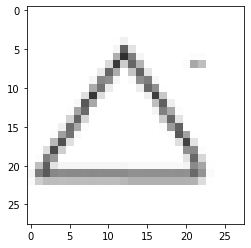

In [ ]:
plt.imshow(temp)

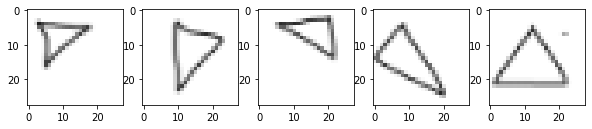

In [ ]:
fig = plt.figure(figsize = (10,2))
for i in range(1,6):
  ax = plt.subplot(1,5,i)
  img= imageio.imread(glob('shapes/triangles/*')[i])
  plt.imshow(img)

In [ ]:
!rm -r /content/shapes/shapes

In [ ]:
!mkdir shapes_val
!mkdir shapes_val/circles
!mkdir shapes_val/squares
!mkdir shapes_val/triangles

In [ ]:
squares = glob('shapes/squares/*')
circles = glob('shapes/circles/*')
triangles = glob('shapes/triangles/*')

In [ ]:
type(squares), len(squares)

(list, 100)

In [ ]:
for img in squares[-20:]:
  os.replace(img, img.replace('shapes', 'shapes_val'))
for img in circles[-20:]:
  os.replace(img, img.replace('shapes', 'shapes_val'))
for img in triangles[-20:]:
  os.replace(img, img.replace('shapes', 'shapes_val'))

In [ ]:
!pip install --upgrade tensorflow keras

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [ ]:
classifier = Sequential()

# First Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection (Hidden Layers)
classifier.add(Dense(64, activation='relu'))

# Output Layer
classifier.add(Dense(3, activation='softmax'))

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        '/content/shapes',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        '/content/shapes_val',
        target_size=(28, 28),
        batch_size=32,
        class_mode='categorical')

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [ ]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}

In [ ]:
classifier.fit(
        train_set,
        epochs=50,
        batch_size=32,
        validation_data=validation_set)

Epoch 1/50
8/8 [==============================] - 0s 32ms/step - loss: 0.5895 - accuracy: 0.7583 - val_loss: 0.6911 - val_accuracy: 0.7000
Epoch 2/50
8/8 [==============================] - 0s 33ms/step - loss: 0.5767 - accuracy: 0.7750 - val_loss: 0.7131 - val_accuracy: 0.6833
Epoch 3/50
8/8 [==============================] - 0s 33ms/step - loss: 0.5044 - accuracy: 0.8125 - val_loss: 0.6025 - val_accuracy: 0.7833
Epoch 4/50
8/8 [==============================] - 0s 33ms/step - loss: 0.4661 - accuracy: 0.8625 - val_loss: 0.5932 - val_accuracy: 0.8167
Epoch 5/50
8/8 [==============================] - 0s 31ms/step - loss: 0.5128 - accuracy: 0.8000 - val_loss: 0.5864 - val_accuracy: 0.7833
Epoch 6/50
8/8 [==============================] - 0s 31ms/step - loss: 0.4191 - accuracy: 0.8917 - val_loss: 0.6501 - val_accuracy: 0.7667
Epoch 7/50
8/8 [==============================] - 0s 34ms/step - loss: 0.4106 - accuracy: 0.8667 - val_loss: 0.5956 - val_accuracy: 0.7833
Epoch 8/50
8/8 [===========

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from PIL import Image

In [ ]:
circle_png = Image.open('/content/drive/My Drive/datasets/circle.png')
sq = Image.open('/content/drive/My Drive/datasets/squares.png')
tr = Image.open('/content/drive/My Drive/datasets/Triangle.png')

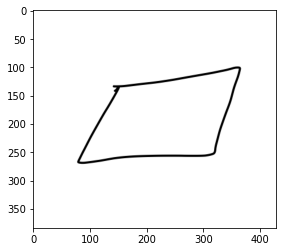

In [ ]:
plt.imshow(sq)

In [ ]:
circle_png = circle_png.convert('RGB')
sq = sq.convert('RGB')
tr = tr.convert('RGB')

In [ ]:
circle_png = circle_png.resize((28,28), Image.ANTIALIAS)
sq = sq.resize((28,28), Image.ANTIALIAS)
tr = tr.resize((28,28), Image.ANTIALIAS)

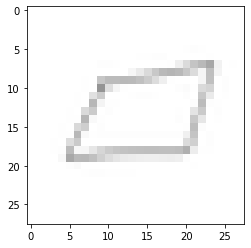

In [ ]:
plt.imshow(sq)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.array(sq).shape

(28, 28, 3)

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
classifier.predict(np.array(tr).reshape(1,28,28,3))

array([[0., 0., 1.]], dtype=float32)

In [ ]:
train_set.class_indices

{'circles': 0, 'squares': 1, 'triangles': 2}